In [1]:
%env LS_COLORS = None
!tree --charset ascii data/dogcat/

env: LS_COLORS=None
/bin/sh: 1: tree: not found


In [1]:
import torch as t
from torch.utils import data
import os
from PIL import Image
import numpy as np

In [2]:
t.__version__

'0.3.1'

In [3]:
class DogCat(data.Dataset):
    def __init__(self, root):
        imgs = os.listdir(root)
        # 所有图片的绝对路径
        # 这里不实际加载图片， 只是指定路径
        # 当调用 __getitem__ 时才会真正读图片
        self.imgs = [os.path.join(root, img) for img in imgs]
        
    def __getitem__(self, index):
        img_path = self.imgs[index]
        # dog -> 1, cat -> 0
        label = 1 if 'dog' in img_path.split('/')[-1] else 0
        pil_img = Image.open(img_path)
        array = np.asarray(pil_img)
        data = t.from_numpy(array)
        return data, label
    
    def __len__(self):
        return len(self.imgs)

In [4]:
dataset = DogCat('./data/dogcat/')
img, label = dataset[0] # 相当于调用 dataset.__getitem__(0)
for img, label in dataset:
    print('66',img.size(), img.float().mean(), label)

66 torch.Size([459, 499, 3]) 122.04812966528554 1
66 torch.Size([200, 176, 3]) 156.76072916666666 1
66 torch.Size([400, 399, 3]) 114.78243107769424 0
66 torch.Size([333, 499, 3]) 146.85738443854677 0
66 torch.Size([387, 500, 3]) 110.5524840654608 0
66 torch.Size([293, 500, 3]) 95.42448691695108 0
66 torch.Size([450, 443, 3]) 129.95903018142295 1
66 torch.Size([400, 369, 3]) 84.98514453477868 1


In [5]:
# PyTorch 提供了 torchvision: 一个视觉工具包，提供了很多视觉图像处理的工具
# 其中 transforms 模块提供了对 PIL Image 对象和 Tensor 对象的常用操作
# 对 PIL Image的常见操作如下：
# 1. Resize: 调整图片尺寸
# 2. CenterCrop 、RandomCrop 、RandomSizedCrop: 裁剪图片
# 3. pad：填充
# 4. ToTensor： 将 PIL Image 对象转成 Tensor， 会自动将[0, 255] 归一化至 [0, 1]
# 对 Tensor 的常见操作如下：
# 1. Normalize: 标准化，即减均值，除以标准差
# 2. ToPILImage: 将 Tensor 转为 PIL Image 对象

In [6]:
import os
from PIL import Image
import numpy as np
from torchvision import transforms as T

transform = T.Compose([
    T.Resize(224), # 缩放图片（Image），保持长宽比不变，最短边为 224 像素
    T.CenterCrop(224), # 从图片中间切分出 224 × 224 的图片
    T.ToTensor(), # 将图片(Image) 转成 Tensor， 归一化至 [0, 1]
    T.Normalize(mean = [.5, .5, .5], std = [.5, .5, .5]) # 标准化至 [-1, 1]
])

class DogCat(data.Dataset):
    def __init__(self, root, transforms = None):
        imgs = os.listdir(root)
        self.imgs = [os.path.join(root, img) for img in imgs]
        self.transforms = transforms
        
    def __getitem__(self, index):
        img_path = self.imgs[index]
        label = 0 if 'dog' in img_path.split('/')[-1] else 1
        data = Image.open(img_path)
        if self.transforms:
            data = self.transforms(data)
        return data, label
    
    def __len__(self):
        return len(self.imgs)

In [7]:
dataset = DogCat('./data/dogcat/', transforms = transform)
img, label = dataset[0]
for img, label in dataset:
    print('66',img.size(), label)

66 torch.Size([3, 224, 224]) 0
66 torch.Size([3, 224, 224]) 0
66 torch.Size([3, 224, 224]) 1
66 torch.Size([3, 224, 224]) 1
66 torch.Size([3, 224, 224]) 1
66 torch.Size([3, 224, 224]) 1
66 torch.Size([3, 224, 224]) 0
66 torch.Size([3, 224, 224]) 0


In [8]:
# ImageFolder
# ImageFolder 假设所有的文件按文件夹保存，每个文件夹下存储统一类别的图片，文件夹名为类名，器构造函数如下：
#ImageFolder(root, transform = None, target_transform = None, loader = default_loader)
# 它主要有四个参数：
# 1. root：在 root 指定的路径下寻找图片
# 2. tansform：对 PIL Image 进行转换操作，tansform 的输入是使用 loader 读取图片的返回对象
# 3. target_transform: 对 label 的转换
# 4. loader: 指定加载图片的函数， 默认操作是读取为 PIL Image 对象


In [9]:
!tree --charset ASCII data/dogcat_2/

/bin/sh: 1: tree: not found


In [10]:
from torchvision.datasets import ImageFolder
dataset = ImageFolder('data/dogcat_2/')

In [11]:
# cat 文件夹的图片对应 label 0, dog 对应 1
dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [12]:
# 所有图片的路径和对应的 label
dataset.imgs

[('data/dogcat_2/cat/cat.14.jpg', 0),
 ('data/dogcat_2/cat/cat.37.jpg', 0),
 ('data/dogcat_2/cat/cat.45.jpg', 0),
 ('data/dogcat_2/cat/cat.89.jpg', 0),
 ('data/dogcat_2/dog/dog.18.jpg', 1),
 ('data/dogcat_2/dog/dog.21.jpg', 1),
 ('data/dogcat_2/dog/dog.42.jpg', 1),
 ('data/dogcat_2/dog/dog.88.jpg', 1)]

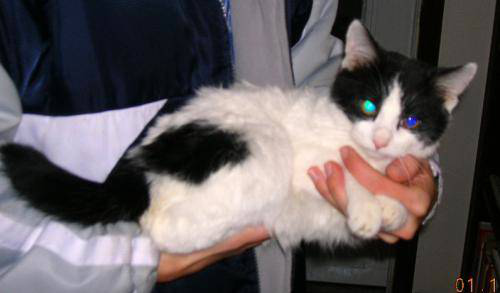

In [13]:
# 没有任何的 transform， 所以返回的还是 PIL Image 对象
dataset[0][1] # 第一维是第几张图， 第二维为 1 返回 label
dataset[0][0] # 为 0 返回图片数据，返回的 Image 对象如下图所示

In [14]:
# 加上 transform
normalize = T.Normalize(mean = [0.4, 0.4, 0.4], std = [0.2, 0.2, 0.2])
transform = T.Compose([
    T.RandomSizedCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    normalize,
])

/home/mzl/virtualenv0.3/venv/lib/python3.6/site-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")


In [15]:
dataset = ImageFolder('data/dogcat_2/', transform = transform)

In [16]:
# 深度学习中图片数据一律保存成 CxHxW， 即通道数 × 图片高 × 图片宽
dataset[0][0].size()

torch.Size([3, 224, 224])

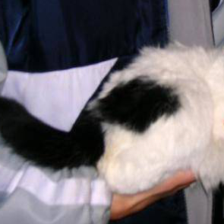

In [17]:
to_img = T.ToPILImage()
# 0.2 和 0.4 是标准差和均值的近似
to_img(dataset[0][0] * 0.2 + 0.4) # 程序输出的图片如下图所示

In [18]:
# DataLoader
#DataLoader(dataset, batch_size = 1, shuffle = False, sampler = None, num_workers = 0, 
#           collate_fn = default_collate, pin_memory = False, drop_last = False)
# 1. dataset: 加载的数据集（Dateset 对象）
# 2. batch_size: batch size (批大小)
# 3. shuffle: 是否将数据打乱
# 4. sampler： 样本抽样
# 5. num_workers: 使用多进程加载的进程数， 0 代表不使用多进程
# 6. collate_fn: 如何将多个样本数据拼接成一个 batch, 一般使用默认的拼接方式即可
# 7. pin_memory: 是否将多个数据保存在 pin memory 区， pin memory 中的数据转到 GPU 会快一些
# 8. drop_list: dataset 中的数据个数可能不是 batch_size 的整数倍， drop_list 为 True 会将多出来
# 不足一个 batch 的数据丢弃

In [19]:
from torch.utils.data import DataLoader

In [20]:
dataloader = DataLoader(dataset, batch_size = 3, shuffle = True, num_workers = 0, 
                        drop_last = False)
dataiter = iter(dataloader)
imgs, labels = next(dataiter)
imgs.size() # batch_size, channel, height, weight

torch.Size([3, 3, 224, 224])

In [21]:
# dataloader 是一个可迭代对象
#for batch_datas, batch_labels in dataloader:
#    train()
# 或
dataiter = iter(dataiter)
batch_datas, batch_labels = next(dataiter)

In [22]:
# 如果遇到某个样本无法读取，最好的方法是将出错的样本剔除
# 可以返回 None，但需要注意这样情况下 dataloader 返回的一个 batch 的样本数目会少于 batch_size
class NewDogCat(DogCat): # 继承前面实现的 DogCat 数据集
    def __getitem__(self, index):
        try:
            # 调用父类的获取函数， 即 DogCat.__getitem__(self, index)
            return super(NewDogCat, self).__getitem__(index)
        except:
            return None, None

from torch.utils.data.dataloader import default_collate # 导入默认的拼接方式
def my_collate_fn(batch):
    '''
    batch 中每个元素形如（data， label）
    '''
    # 过滤为 None 的数据
    batch = list(filter(lambda x:x[0] is not None, batch))
    return default_collate(batch) # 用默认方式拼接过滤后的 batch 数据

In [23]:
#dataset = NewDogCat('./data/dogcat_wrong/', transforms = transform)

In [24]:
# 对样本损坏或数据集加载异常等情况， 还可以通过其他方式解决
# 例如遇到异常情况，就随机取一张图片代替
class NewDogCat(DogCat):
    def __getitem__(self, index):
        try:
            return super(NewDogCat, self).__getitem__(index)
        except:
            new_index = random.randint(0, len(self) - 1)
            return self[new_index]
        
#相比较丢弃异常图片而言， 这种做法会好一些， 因为它哪能保证每个 batch 样本的数目仍是 batch_size
#但大多数情况下，最好的方式还是对数据进行彻底的清洗

In [25]:
# 这里介绍一个很有用的采样方法： weightedRandomSampler, 它会根据每个样本的权重选取数据
# 在样本比例不均衡的问题中，可用它进行重采样
# 构建 weightRandomSamepler 时需要提供的参数：
# 1. weights: 每个样本的权重
# 2. num_samples: 共选取的样本总数 num_samples
# 3. replacement :是否可以重复采样某一个数据，如果设为 False,当某一类样本被全部选取完
# 但其样本数目仍未达到 num_samples 时， sampler 将不会再从该类中选择数据，此时可能导致 weights 参数失效

In [26]:
dataset = DogCat('data/dogcat/', transforms = transform)

# 狗的图片被取出的概率是猫的两倍
# 两类图片被取出的概率与 weights 的绝对大小无关，只和比值有关
weights = [2 if label == 1 else 1 for data, label in dataset]
weights

[1, 1, 2, 2, 2, 2, 1, 1]

In [31]:
from torch.utils.data.sampler import WeightedRandomSampler
sampler = WeightedRandomSampler(weights,
                               num_samples = 9,
                                replacement = True
                               )
dataloader = DataLoader(dataset,
                        batch_size = 3,
                        sampler = sampler
                       )

for data, labels in dataloader:
    print('66', labels.tolist())

66 [4, 1, 9]
66 [1, 2, 0]
66 [1, 4, 4]
